# Hadamard

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `Hadamard`
The Hadamard gate

This converts between the X and Z basis.

$$\begin{aligned}
H |0\rangle = |+\rangle \\
H |-\rangle = |1\rangle
\end{aligned}$$

#### Registers
 - `q`: The qubit


In [2]:
from qualtran.bloqs.basic_gates import Hadamard

### Example Instances

In [3]:
hadamard = Hadamard()

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([hadamard],
           ['`hadamard`'])

## `CHadamard`
The controlled Hadamard gate

#### Registers
 - `ctrl`: The control qubit.
 - `target`: The target qubit.


In [5]:
from qualtran.bloqs.basic_gates import CHadamard

### Example Instances

In [6]:
chadamard = Hadamard().controlled()
assert isinstance(chadamard, CHadamard)

#### Graphical Signature

In [7]:
from qualtran.drawing import show_bloqs
show_bloqs([chadamard],
           ['`chadamard`'])

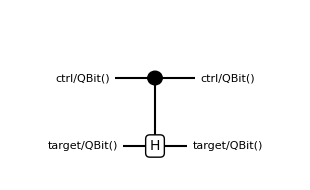

In [8]:
show_bloq(chadamard, 'musical_score')

### Specialty circuits

The `CHadamard` bloq is atomic and cannot be decomposed with `.decompose_bloq()`. An actual implementation on an error-corrected quantum computer will likely be architecture-dependent. A naive circuit for CHadamard can be found using Cirq.

In [9]:
circuit = cirq.Circuit(cirq.decompose_multi_controlled_rotation(
    cirq.unitary(cirq.H),
    controls=[cirq.NamedQubit('ctrl')],
    target=cirq.NamedQubit('q'),
))
circuit

ctrl: ───S─────────────────────────────@───────────────────────────────────@───────────────────────────
                                       │                                   │
         ┌                         ┐   │   ┌                           ┐   │   ┌                   ┐
q: ──────│0.707+0.707j 0.   +0.j   │───X───│ 0.653+0.653j -0.271+0.271j│───X───│0.-0.924j 0.-0.383j│───
         │0.   +0.j    0.707-0.707j│       │ 0.271+0.271j  0.653-0.653j│       │0.-0.383j 0.+0.924j│
         └                         ┘       └                           ┘       └                   ┘